
Cleaned File:
Mean Squared Error after normalization: 22.454835288030246
[12.55716137 13.72660559 31.45179104 20.97615945 35.72942464 32.54323229
 16.91680341 17.4517145  23.4584347  32.01867231 22.82256732 18.38903049
 28.4528879  38.8429299  38.38400981 24.84823397 23.01074481 31.09342663
 18.02504045 25.69721106 26.89711242 16.50305275 18.65197817 11.36634075
 11.06321299 20.87495098  9.54934235 20.72408921 27.99187955 19.57659664
 34.48669308 28.41972889 20.98364036 13.77381573 24.92708494 12.53992867
 13.62992541 21.39227796 34.68190562 19.69866269 23.27387764 34.4485027
 19.83478332 19.75577967 19.63491863 21.00582668 14.98301544 21.91606751
 18.842742   24.50697735 14.51733049 23.78891466 14.18487529 18.13709634
 30.62582494 15.14906941 26.32443517 18.86648612 17.75416238 18.75030669
 21.00392464 31.69729902 25.93498535 20.14189409 21.69372039 19.16905648
 21.99903895 21.12894487 27.08979512 34.12277276 34.74015607 22.91589777
 13.37716653 23.04179246 19.4158798  13.25878535 29

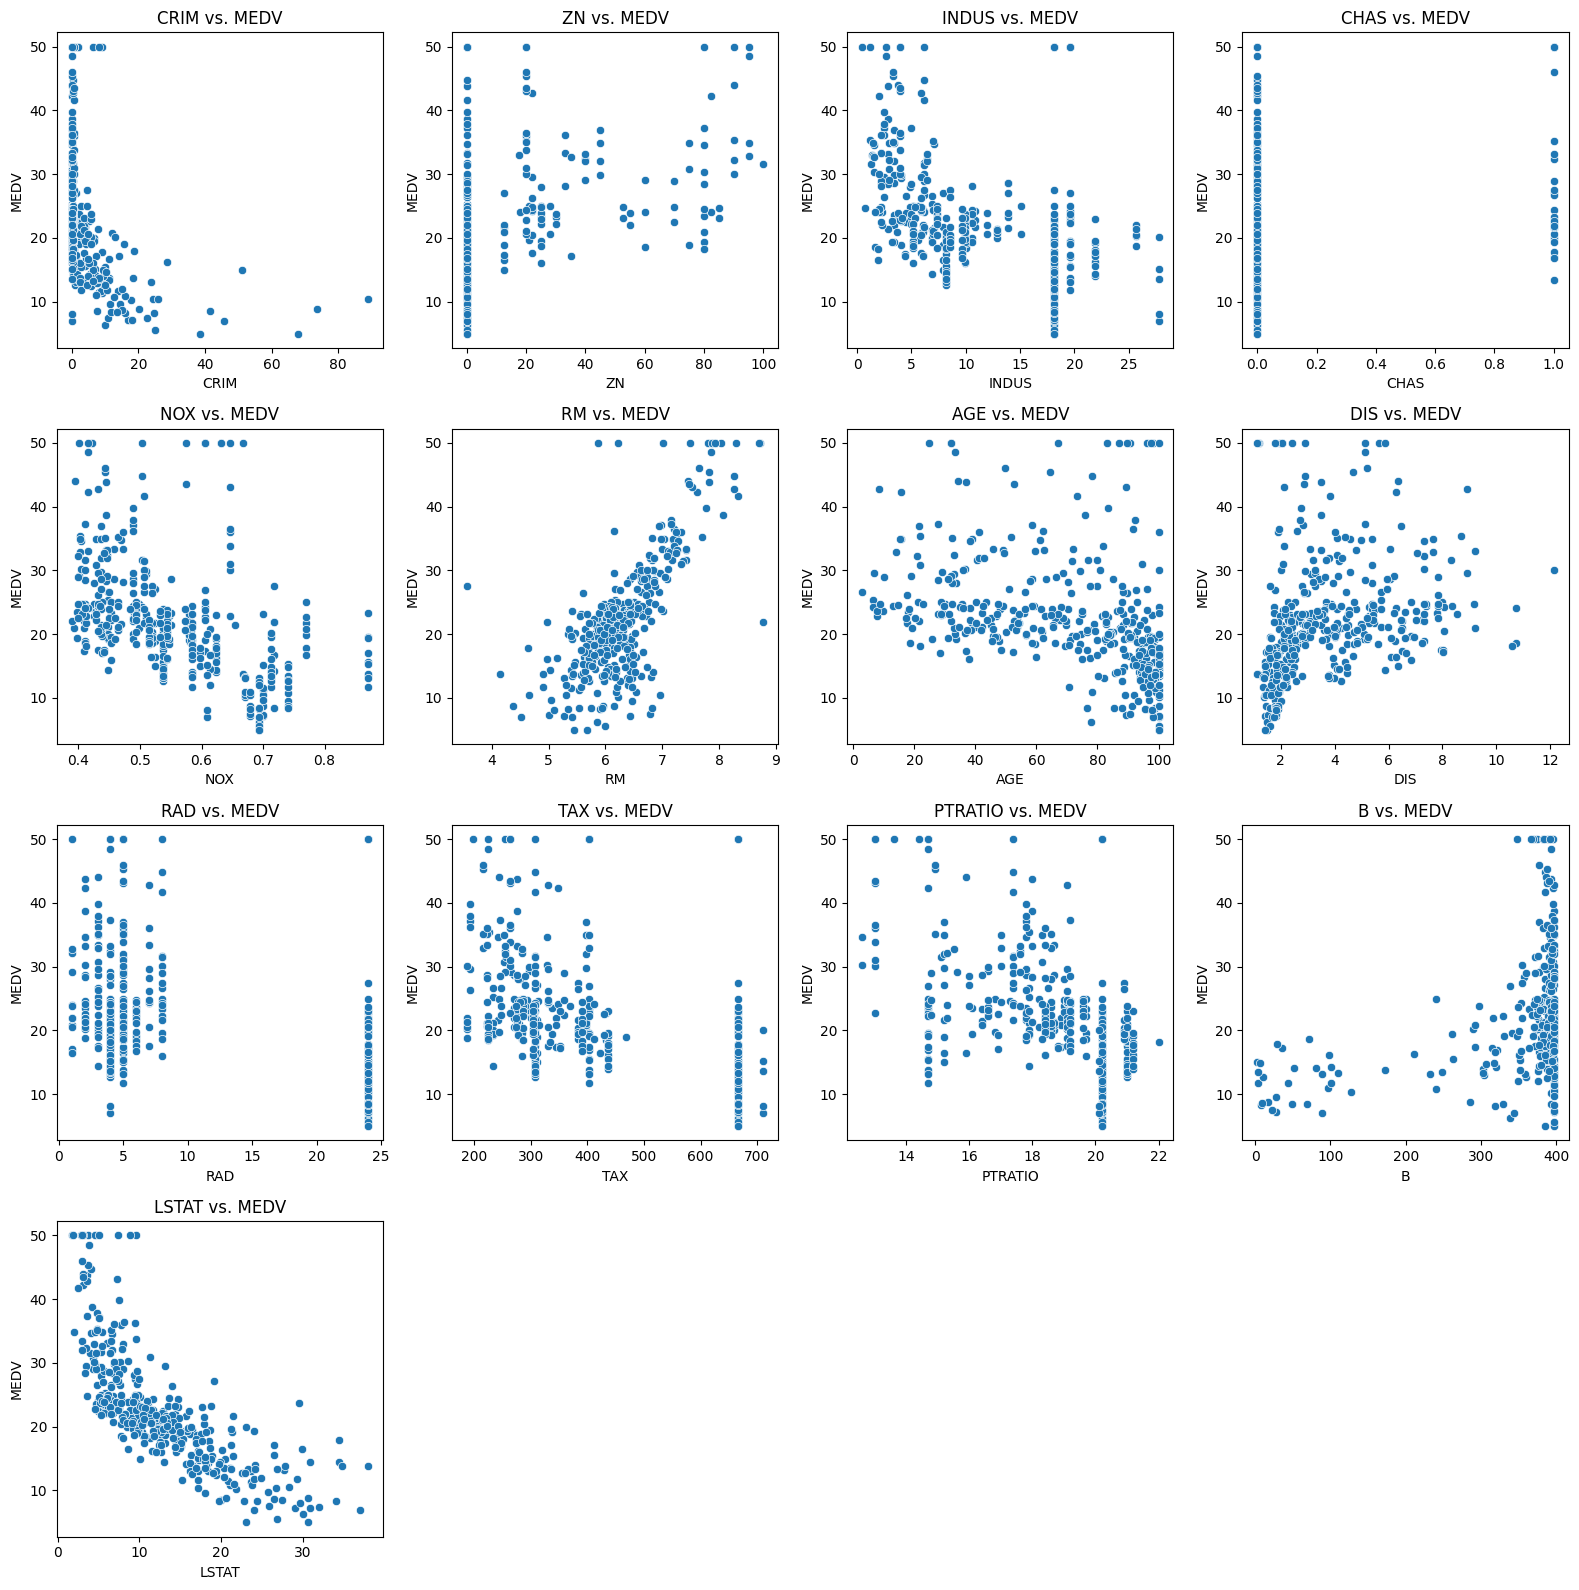

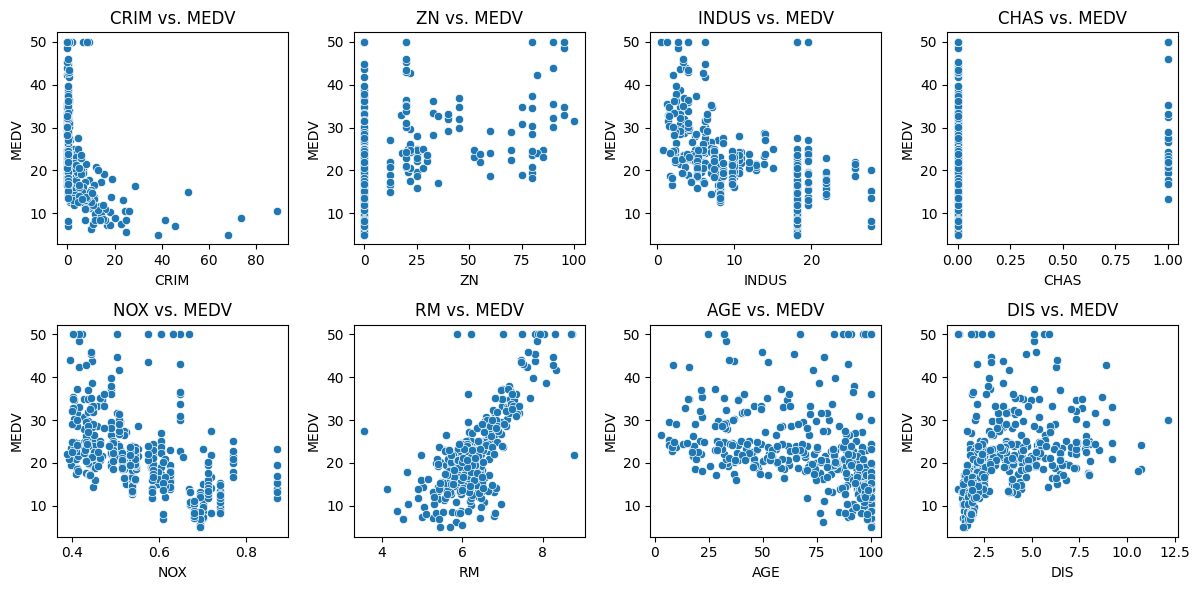

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
file = pd.read_csv("HousingData.csv")

# Drop rows with missing values
file = file.dropna()

# Calculate quartiles and IQR
Q1 = file.quantile(0.25)
Q3 = file.quantile(0.75)
IQR = Q3 - Q1

min_bound = Q1 - 1.5 * IQR
max_bound = Q3 + 1.5 * IQR
cleaned_file = file[(file >= min_bound) & (file <= max_bound)]
cleaned_file = cleaned_file.dropna()
print("\nCleaned File:")

X = file.drop(columns=['MEDV'])
y = np.array(file['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


# Normalize the features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train_normalized, y_train)
# Making predictions
y_pred = model.predict(X_test_normalized)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error after normalization:", mse)
print(y_pred)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2*100)


# Plotting the relationship between predictors and the target variable
num_predictors = len(X.columns)
num_rows = (num_predictors + 3) // 4  # Calculate the number of rows needed for subplots
plt.figure(figsize=(16, 4 * num_rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(X.columns):
    plt.subplot(num_rows, 4, i + 1)  # Adjust the subplot layout dynamically
    sns.scatterplot(x=col, y='MEDV', data=file)
    plt.title(f'{col} vs. MEDV')

plt.tight_layout()
plt.show()

# Plotting the best-fitted line generated by the linear regression model
plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns[:8]):  # Limiting to 8 subplots
    plt.subplot(2, 4, i + 1)
    sns.scatterplot(x=col, y='MEDV', data=file)
    plt.title(f'{col} vs. MEDV')
plt.tight_layout()
plt.show()